## Trabalho T1 sobre Erros e Zeros de Funções

### Métodos Numéricos Computacionais
### UFSM - 2º Semestre de 2023

**Nome dos componentes do grupo:**

**Questão 1:**

A série de Maclaurin para a função arco-tangente converge para $-1<x \leq 1$ e é determinada por

$$
\operatorname{arctg} x=\lim _{n \rightarrow \infty} P_n(x)=\lim _{n \rightarrow \infty} \sum_{i=1}^n(-1)^{i+1} \frac{x^{2 i-1}}{2 i-1} .
$$

**a.** Use $o$ fato de que $\operatorname{tg} \pi / 4=1$ para determinar o número $n$ de termos da série que precisam ser somados para garantir que $\left|4 P_n(1)-\pi\right|<10^{-3}$.

**b.** A linguagem de programação $\mathrm{C}++$ exige que o valor de $\pi$ seja conhecido com precisão de $10^{-10}$. Quantos termos da série seriam necessários somar para obter essa ordem de precisão?

**c.** O método mostrado acima pode ser substancialmente melhorado observando que $\pi / 4=\operatorname{arctg} \frac{1}{2}+\operatorname{arctg} \frac{1}{3}$ e calculando a série para o arco-tangente em $\frac{1}{2}$ e em $\frac{1}{3}$. Determine o número de termos que devem ser somados para garantir uma aproximação de $\pi$ com precisão de $10^{-3}$.

In [24]:
#A

import math

x = 1
i = 1
resultado = 0
n = 0
e = 1e-3
while abs(4 * resultado - math.pi) >= e:
    termo = ((-1)**(i+1)) * ((x**(2*i - 1))/(2*i - 1))
    resultado += termo
    i += 1
    n += 1
print("Número de iterações:", n)
print("ArcoTg(1) é ", resultado)

Número de iterações: 1000
ArcoTg(1) é  0.7851481634599485


In [ ]:
import math

x = 1
i = 1
resultado = 0
n = 0
e = 1e-10
numMax = 100000
while abs(4 * resultado - math.pi) >= e and numMax > n:
    termo = ((-1)**(i+1)) * ((x**(2*i - 1))/(2*i - 1))
    resultado += termo
    i += 1
    n += 1
if(numMax <= n):
    print("Número de iterações excedidas:", n)
else:
    print("ArcoTg(1) é ", resultado)
    
#Não conseguimos achar um resultado, pois o código continua fazendo iterações infinitas

Número de iterações excedidas: 100000


In [ ]:
#C

import math

def ArcoTg(x, i):
        termo = ((-1)**(i+1)) * ((x**(2*i - 1))/(2*i - 1))
        return termo

x = 0
i = 1
n = 0
e = 1e-3
while abs(4 * x - math.pi) >= e:
    x += ArcoTg(1/2, i) + ArcoTg(1/3, i)
    i += 1
    n += 1
print("Número de iterações:", n)
print("ArcoTg(1/2) + ArcoTg(1/3) é", x)

Número de iterações: 4
ArcoTg(1/2) + ArcoTg(1/3) é 0.7852126404402638


**Questão 2:** A sequência $\left\{F_n\right\}$, descrita por $F_0=1, F_1=1$ e $F_{n+2}=F_n+F_{n+1}$ se $n \geq 0$, é chamada *sequência de Fibonacci*. 

**a** Considere a sequência $\left\{x_n\right\}$, onde $x_n=F_{n+1} / F_n$. Verifique numéricamente que para valores cada vez maiores de $n$ a sequência parece se aproximar cada vex mais do número $x=(1+\sqrt{5}) / 2$. Que número é esse?


**b.** Verifique numericamente que o mesmo resiltado pode ser obtido por 

$$
\tilde{F}_n=\frac{1}{\sqrt{5}}\left[\left(\frac{1+\sqrt{5}}{2}\right)^n-\left(\frac{1-\sqrt{5}}{2}\right)^n\right] .
$$

In [ ]:
#A

import math

def fibonacci(n):
    fib_seq = [0, 1]
    while len(fib_seq) < n + 1:
        next_number = fib_seq[-1] + fib_seq[-2]
        fib_seq.append(next_number)
    return fib_seq

def calcular_x():
    fib_seq = fibonacci(100)
    i = 2
    while True:
        x = fib_seq[i] / fib_seq[i - 1]
        if i > 2:
            erro = abs(x - fib_seq[i-1] / fib_seq[i - 2])
            if erro < 1e-16:
                print(f"O resultado convergiu na {i}ª iteração e resultou em {x}")
                break
        i += 1
    return fib_seq[-1] / fib_seq[-2]

x = calcular_x()


O resultado convergiu na 42ª iteração e resultou em 1.618033988749895


In [ ]:
#B

import math

def calcular_x_b():
    i = 2
    while True:
        x = func_aurea(i) / func_aurea(i-1)
        if i > 2:
            erro = abs(x - func_aurea(i-1) / func_aurea(i-2))
            if erro < 1e-16:
                print(f"O resultado convergiu na {i}ª iteração e resultou em {x}")
                break
        i += 1
    return 1


def func_aurea(i):
  x = (1 / math.sqrt(5)) * ((((1 + math.sqrt(5)) / 2) ** i) - (((1 - math.sqrt(5)) / 2) ** i))
  return x

x_b = calcular_x_b()

O resultado convergiu na 40ª iteração e resultou em 1.618033988749895


**Questão 3.** Utilize o método da bisseção, o método do ponto fixo (se possível), o método de Newton e das secantes para determinar todas as soluções das equações abaixo com precisão de $10^{-5}$:

**a.** $x^2-4 x+4-\ln x=0 \quad$ 

**b.** $x+1-2 \operatorname{sen} \pi x=0 \quad$  

**c.** $3 x^2-e^x=0$

Para cada uma das equações faça um gráfico com as curvas *erro $\times$ iteração* de cada método utilizado. Comente os resultados que você obteve. 

Método da Bisseção
A raiz encontrada é: 3.057100296020508

Método do PontoFixo
A raiz encontrada é: 1.4123847258346358

Método de Newton
A raiz encontrada é: 1.4123911719625806

Método da Secante
A raiz encontrada é: 3.0571035519940715


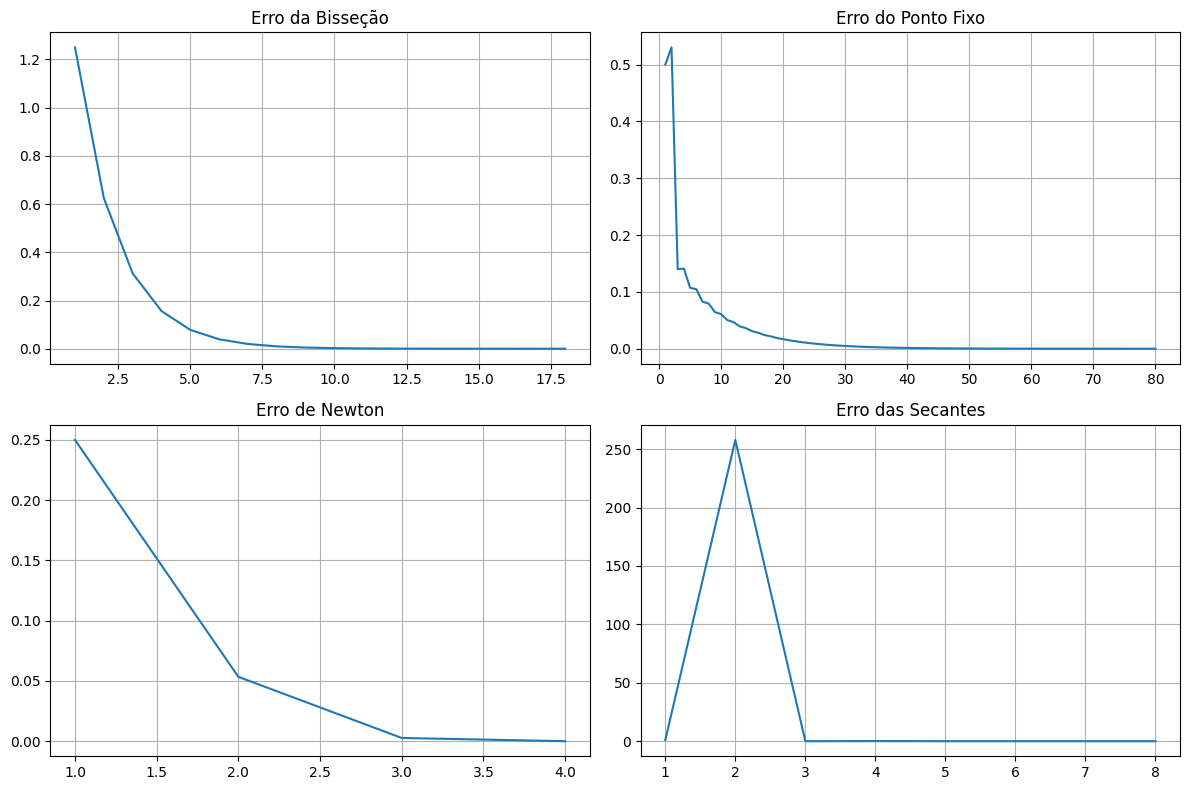

In [ ]:
#A

import math
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 4*x + 4 - math.log(x)

def PontoF(x):
  return x**2 - 3*x + 4 - math.log(x)

def Bissecao():
    a, b = 3.0, 6.0  
    e = 1e-5
    i = 0
    errors = []  
    if f(a)*f(b) < 0:
        while (b-a)/2 > e:
            c = (a+b)/2
            i += 1
            if f(a)*f(c) < 0:
                b = c
            else:
                a = c
            errors.append((b - a) / 2)

        raiz = (a + b) / 2
        return raiz, errors  


def PontoFixo():
    x0 = 1.0
    erro = 10
    x = x0
    numMax = 100  
    i = 0
    e = 1e-5
    errors = []  

    while i <= numMax and erro > e:
        x1 = PontoF(x)               
        erro = abs(x1-x)/abs(x1)   
        x = x1
        i += 1
        errors.append(erro)

    return x, errors 


def Newton():
    erro = 10
    x = 1.0
    numMax = 100
    i = 0
    e = 1e-5
    errors = [] 

    while i <= numMax and erro > e:
        x1 = x - (f(x))/(2*x - 4 - 1/x) 
        erro = abs(x1-x)/abs(x1)   
        x = x1
        i += 1
        errors.append(erro)  

    return x, errors  


def Secante():
    x0 = 1
    x1 = 3.5
    erro = 10
    numMax = 100
    i = 1
    e = 1e-5
    errors = [] 

    while i <= numMax and erro > e:
        x2 = x1 - (f(x1) * (x1 - x0) / (f(x1) - f(x0)))
        erro = abs(x2 - x1) / abs(x2)
        x0 = x1
        x1 = x2
        i += 1
        errors.append(erro)  

    return x2, errors  
  

Bissecao()
PontoFixo()
Newton()
Secante()


x1, erro_bi = Bissecao()
x2, erro_pf = PontoFixo()
x3, erro_new = Newton()
x4, erro_sec = Secante()


print("Método da Bisseção")
print("A raiz encontrada é:", x1)

print("\nMétodo do PontoFixo")
print("A raiz encontrada é:", x2)

print("\nMétodo de Newton")
print("A raiz encontrada é:", x3)

print("\nMétodo da Secante")
print("A raiz encontrada é:", x4)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(erro_bi) + 1), erro_bi)
plt.title('Erro da Bisseção')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(erro_pf) + 1), erro_pf)
plt.title('Erro do Ponto Fixo')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, len(erro_new) + 1), erro_new)
plt.title('Erro de Newton')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, len(erro_sec) + 1), erro_sec)
plt.title('Erro das Secantes')
plt.grid(True)

plt.tight_layout()
plt.show()


Método da Bisseção
A raiz encontrada é: 0.2060295104980469

Método do PontoFixo
A raiz encontrada é: -1.000000000000002

Método de Newton
A raiz encontrada é: 0.6819748087386475

Método da Secante
A raiz encontrada é: -2.206035119529392


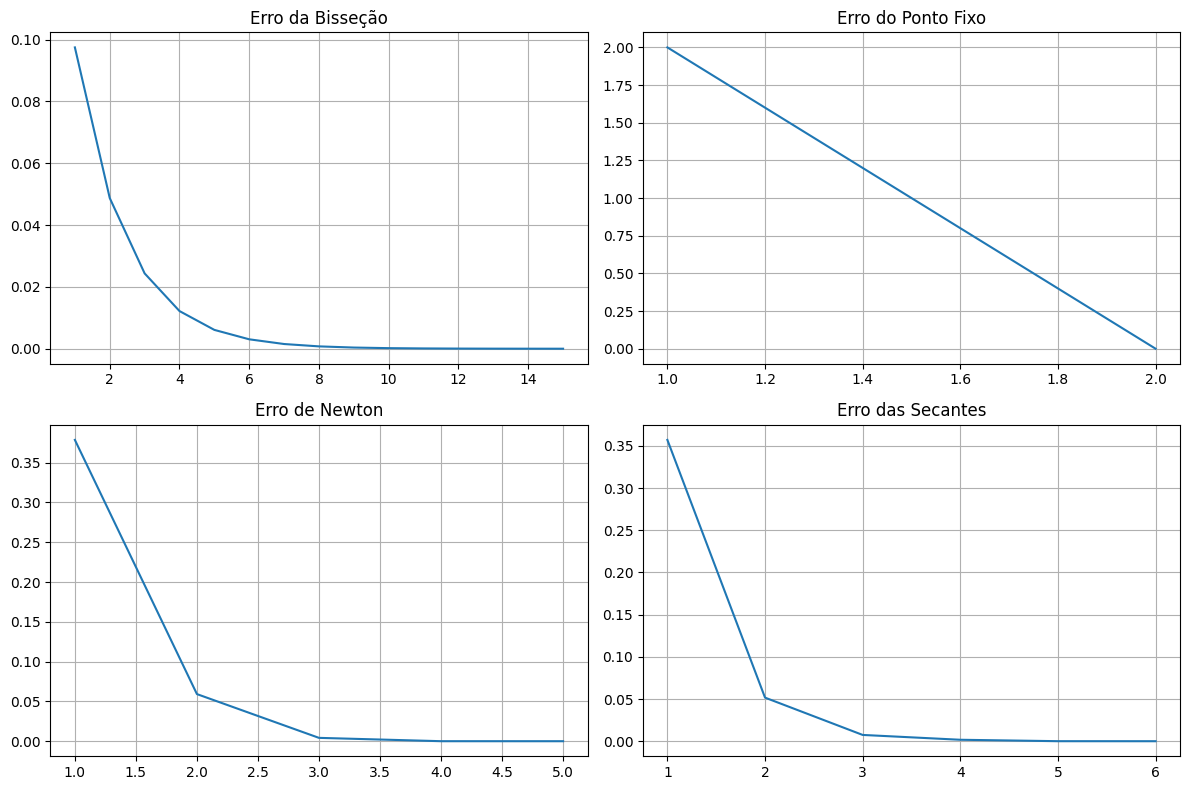

In [ ]:
#B

import math
import matplotlib.pyplot as plt

def f(x):
    return x+1-2*math.sin(math.pi*x)

def PontoF(x):
  return 2*math.sin(math.pi*x)-1
  
def Bissecao():
    a, b = 0.01, 0.4  
    e = 1e-5
    i = 0
    errors = []  
    if f(a)*f(b) < 0:
        while (b-a)/2 > e:
            c = (a+b)/2
            i += 1
            if f(a)*f(c) < 0:
                b = c
            else:
                a = c
            errors.append((b - a) / 2)  

        raiz = (a + b) / 2
        return raiz, errors 


def PontoFixo():
    x0 = 1.0
    erro = 10
    x = x0
    numMax = 100  
    i = 0
    e = 1e-5
    errors = []  

    while i <= numMax and erro > e:
        x1 = PontoF(x)               
        erro = abs(x1-x)/abs(x1)   
        x = x1
        i += 1
        errors.append(erro)  

    return x, errors 


def Newton():
    erro = 10
    x = 1.0
    numMax = 100
    i = 0
    e = 1e-5
    errors = []  

    while i <= numMax and erro > e:
        x1 = x - (f(x))/(1-2*math.pi*math.cos(math.pi*x))
        erro = abs(x1-x)/abs(x1)   
        x = x1
        i += 1
        errors.append(erro)  

    return x, errors  


def Secante():
    x0 = -2
    x1 = -1.5
    erro = 10
    numMax = 100
    i = 1
    e = 1e-5
    errors = []  

    while i <= numMax and erro > e:
        x2 = x1 - (f(x1) * (x1 - x0) / (f(x1) - f(x0)))
        erro = abs(x2 - x1) / abs(x2)
        x0 = x1
        x1 = x2
        i += 1
        errors.append(erro)  

    return x2, errors  
  

Bissecao()
PontoFixo()
Newton()
Secante()

x1, erro_bi = Bissecao()
x2, erro_pf = PontoFixo()
x3, erro_new = Newton()
x4, erro_sec = Secante()

print("Método da Bisseção")
print("A raiz encontrada é:", x1)

print("\nMétodo do PontoFixo")
print("A raiz encontrada é:", x2)

print("\nMétodo de Newton")
print("A raiz encontrada é:", x3)

print("\nMétodo da Secante")
print("A raiz encontrada é:", x4)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(erro_bi) + 1), erro_bi)
plt.title('Erro da Bisseção')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(erro_pf) + 1), erro_pf)
plt.title('Erro do Ponto Fixo')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, len(erro_new) + 1), erro_new)
plt.title('Erro de Newton')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, len(erro_sec) + 1), erro_sec)
plt.title('Erro das Secantes')
plt.grid(True)

plt.tight_layout()
plt.show()


Método da Bisseção
A raiz encontrada é: -0.458965539932251

Método do PontoFixo
A raiz encontrada é: 0.9100003573265589

Método de Newton
A raiz encontrada é: -0.45896226753694863

Método da Secante
A raiz encontrada é: 3.7330790326819776


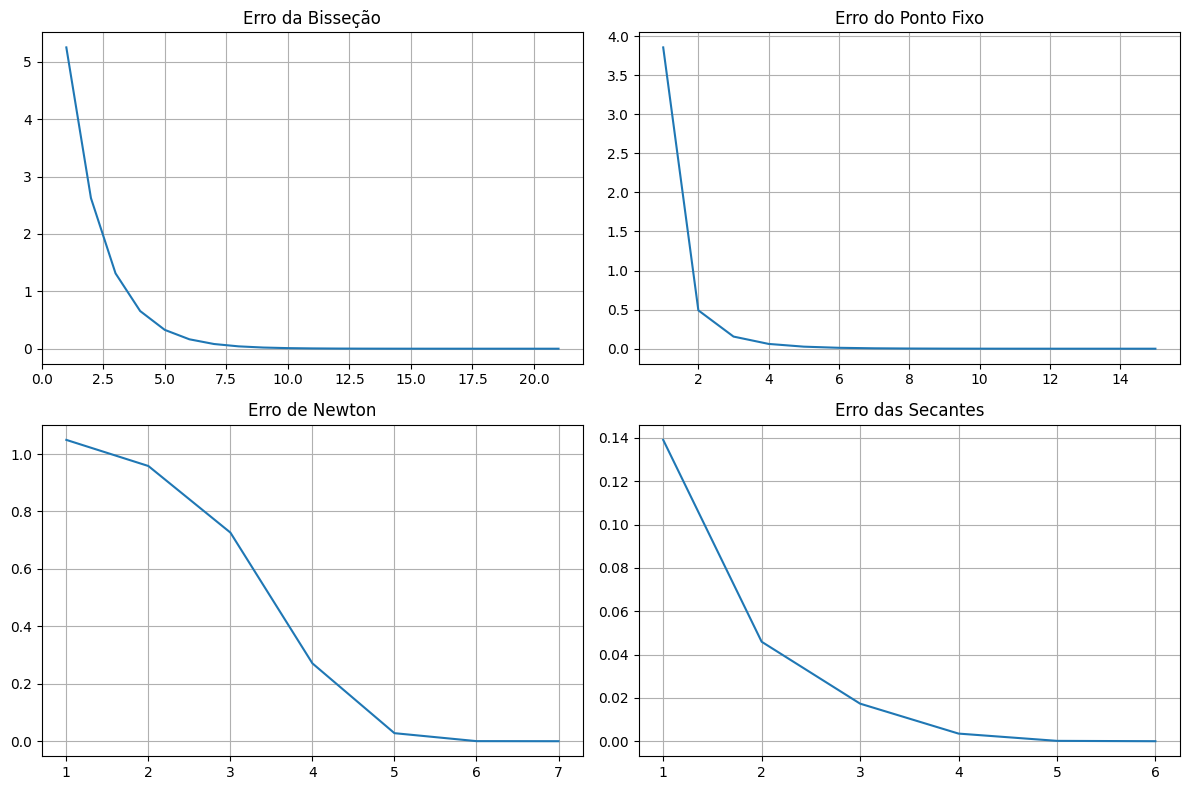

In [ ]:
#C

import math
import matplotlib.pyplot as plt

def f(x):
    return 3*x**2 - math.e**x

def PontoF(x):
  return math.sqrt((math.e**x)/3)


def Bissecao():
    a, b = -10, 11 
    e = 1e-5
    i = 0
    errors = []  
    if f(a)*f(b) < 0:
        while (b-a)/2 > e:
            c = (a+b)/2
            i += 1
            if f(a)*f(c) < 0:
                b = c
            else:
                a = c
            errors.append((b - a) / 2) 

        raiz = (a + b) / 2
        return raiz, errors 


def PontoFixo():
    x0 = -1
    erro = 10
    x = x0
    numMax = 100  
    i = 0
    e = 1e-5
    errors = []  

    while i <= numMax and erro > e:
        x1 = PontoF(x)               
        erro = abs(x1-x)/abs(x1)   
        x = x1
        i += 1
        errors.append(erro)  

    return x, errors 


def Newton():
    erro = 10
    x = 0.1
    numMax = 100
    i = 0
    e = 1e-5
    errors = []  

    while i <= numMax and erro > e:
        x1 = x - (f(x))/(6*x - math.e**x) 
        erro = abs(x1-x)/abs(x1)   
        x = x1
        i += 1
        errors.append(erro)  

    return x, errors  


def Secante():
    x0 = 3
    x1 = 4
    erro = 10
    numMax = 100
    i = 0
    e = 1e-5
    errors = [] 

    while i <= numMax and erro > e:
        x2 = x1 - (f(x1) * (x1 - x0) / (f(x1) - f(x0)))
        erro = abs(x2 - x1) / abs(x2)
        x0 = x1
        x1 = x2
        i += 1
        errors.append(erro) 

    return x2, errors  
  

Bissecao()
PontoFixo()
Newton()
Secante()


x1, erro_bi = Bissecao()
x2, erro_pf = PontoFixo()
x3, erro_new = Newton()
x4, erro_sec = Secante()


print("Método da Bisseção")
print("A raiz encontrada é:", x1)

print("\nMétodo do PontoFixo")
print("A raiz encontrada é:", x2)

print("\nMétodo de Newton")
print("A raiz encontrada é:", x3)

print("\nMétodo da Secante")
print("A raiz encontrada é:", x4)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(erro_bi) + 1), erro_bi)
plt.title('Erro da Bisseção')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(erro_pf) + 1), erro_pf)
plt.title('Erro do Ponto Fixo')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, len(erro_new) + 1), erro_new)
plt.title('Erro de Newton')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, len(erro_sec) + 1), erro_sec)
plt.title('Erro das Secantes')
plt.grid(True)

plt.tight_layout()
plt.show()


**Questão 4:** Um objeto em queda vertical no ar está sujeito à resistência viscosa, bem como à força da gravidade. Suponha que um objeto com massa $m$ seja solto a uma altura $s_0$ e que a altura do objeto após $t$ segundos seja
$$
s(t)=s_0-\frac{m g}{k} t+\frac{m^2 g}{k^2}\left(1-e^{-k t / m}\right),
$$
onde $g=32,17$ pés $/ \mathrm{s}^2$ e $k$ representa o coeficiente de resistência do ar em lb-s/pé. Suponha que $s_0=300$ pés, $m=0,25$ lb e $k=0,1$ lb-s/pé. Determine, com precisão de $0,01$ s, o tempo decorrido até que o objeto alcance o solo. Use o de sua escolha.

In [ ]:
import math

#4)
so = 300
m = 0.25  
g = 32.17  
k = 0.1  

def f(x):
    return so - (((m*g)/k)*x) + (((m ** 2)*g)/(k**2)) * (1 - math.exp(-k * x / m))


x0 = 6.0
x1 = 6.5
erro = 10
x = x1
x_ant = x0
numMax = 10000 
i = 1
e = 1e-2

while i <= numMax and erro > e:
    x2 = x - f(x) / ((f(x) - f(x_ant)) / (x - x_ant))  
    erro = abs(x - x_ant) / abs(x)  
    x_ant = x  
    x = x2
    i += 1

if erro < e:
    print("O tempo decorrido até o objeto alcançar o solo foi de", x)
else:
    print("Número máximo de iterações excedido")


O tempo decorrido até o objeto alcançar o solo foi de 6.003726308758998


**Questão 5:** Uma partícula começa a se movimentar sobre um plano inclinado liso cujo ângulo $\theta$ está variando com velocidade constante

$$
\frac{d \theta}{d t}=\omega<0
$$

Depois de $t$ segundos, a posição do objeto é dada por

$$
x(t)=-\frac{g}{2 \omega^2}\left(\frac{e^{\omega t}-e^{-\omega t}}{2}-\operatorname{sen} \omega t\right) .
$$

Suponha que a partícula tenha se deslocado $52$ cm em $1$ segundo. Determine, com precisão de $10^{-5}$, a velocidade $\omega \operatorname{com}$ a qual $\theta$ varia. Suponha que $g=9,8 \mathrm{m} / \mathrm{s}^2$. Use o método que preferir e justifique sua escolha.  

![fig_triang.png](fig_triang.png)

In [ ]:
#5

import math

def f(w):
    g = 9.8
    target_velocity = 52 / 100  
    return -((g / (2 * w**2)) * (((math.exp(w)) - (math.exp(-w))) / 2 - math.sin(w)) - target_velocity)

def f_linha(w):
    g = 9.8
    return -((g * (math.exp(w) + math.exp(-w)) - 2 * math.sin(w)) / (2 * w**3))

def modulo(x):
    return -x if x < 0 else x

x0 = 1.0  
ε = 1e-5  


while True:
    f_value = f(x0)
    f_prime_value = f_linha(x0)
    
    x = x0 - (f_value / f_prime_value)
    
    if modulo(x - x0) < ε: 
        break
    else:
        x0 = x
    
print("A velocidade w é:", x0)


A velocidade w é: 0.3202209037297079
